# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

In this project we wanted to scrap the daily change of US Dollar (USD) To Indonesian Rupiah (IDR) exchange rate from [EXCHANGE-RATES.org](https://www.exchange-rates.org/exchange-rate-history/usd-idr). EXCHANGE-RATES.org is a website that provides world currency exchange rates and currency exchange rates history.

To scrap the daily change of US Dollar (USD) to Indonesian Rupiah (IDR) Exchange Rate, we need to get date and daily price from the EXCHANGE-RATES.org website. Later on, we will also make a visualization plot from the data we have scraped so we could have better understanding of the data.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import pandas as pd
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use `.content` to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As you can see, we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

The information that we need are the date and daily price which are contained in the table in the EXCHANGE-RATES.org website.

![](exchangerates.png)

To know which part of the code refer to that table, we can just inspect the table.

![](inspect2.png)

From the inspect element above, we know that we need to find the line table with class `history-rates-data`. We can use the `.find()` key at our beautifulsoup object. Let's also call our object to see what we get.

In [5]:
table = soup.find('table', attrs = {'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-04-11">
     April 11, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-04-11">
     2023-4-11
    </a>
   </td>
   <td>
    <span class="w">
     <span class="n


We already get the necessary key to excract all the data we needed. Now we're going to do some programming to extract all the data automatically using loop. But first, we need to find out the length of our data. We will use `find_all` that always return data in format list and `len()` to check how long is our list.

In [6]:
row2 = table.find_all('span', attrs={'class':'n'})
row_length2 = len(row2)
row_length2

129

In [7]:
row3 = table.find_all ('a', attrs={'class':'n'})
row_length3 = len(row3)
row_length3

129

So, the length of our data is 129 rows. Now we will start to extract the data using looping process.

In [8]:
#first we need to make an empty tuple as a placeholder which contains the information that we scrap 
#we name the empty tuple as temp
temp = []

#then we make a loop starting from the first data (index 0) to the last data
for i in range(0, row_length2):

    #get currency data
    USD_to_IDR = table.find_all ('span', attrs={'class':'n'})[i].text
    
    #get period
    Date = table.find_all ('a', attrs={'class':'n'})[i].text
    
    #put the currency and period into the empty tuple
    temp.append((Date, USD_to_IDR))
    
temp 

[('2023-4-11', '$1 = Rp14,915'),
 ('2023-4-10', '$1 = Rp14,950'),
 ('2023-4-7', '$1 = Rp14,941'),
 ('2023-4-6', '$1 = Rp14,931'),
 ('2023-4-5', '$1 = Rp14,960'),
 ('2023-4-4', '$1 = Rp14,957'),
 ('2023-4-3', '$1 = Rp14,922'),
 ('2023-3-31', '$1 = Rp14,969'),
 ('2023-3-30', '$1 = Rp15,024'),
 ('2023-3-29', '$1 = Rp15,034'),
 ('2023-3-28', '$1 = Rp15,060'),
 ('2023-3-27', '$1 = Rp15,107'),
 ('2023-3-24', '$1 = Rp15,165'),
 ('2023-3-23', '$1 = Rp15,085'),
 ('2023-3-22', '$1 = Rp15,253'),
 ('2023-3-21', '$1 = Rp15,301'),
 ('2023-3-20', '$1 = Rp15,343'),
 ('2023-3-17', '$1 = Rp15,375'),
 ('2023-3-16', '$1 = Rp15,429'),
 ('2023-3-15', '$1 = Rp15,459'),
 ('2023-3-14', '$1 = Rp15,380'),
 ('2023-3-13', '$1 = Rp15,416'),
 ('2023-3-10', '$1 = Rp15,503'),
 ('2023-3-9', '$1 = Rp15,495'),
 ('2023-3-8', '$1 = Rp15,449'),
 ('2023-3-7', '$1 = Rp15,429'),
 ('2023-3-6', '$1 = Rp15,354'),
 ('2023-3-3', '$1 = Rp15,278'),
 ('2023-3-2', '$1 = Rp15,322'),
 ('2023-3-1', '$1 = Rp15,249'),
 ('2023-2-28', '$1 = R

The website provides data with the latest to the previous time range. Meanwhile, to perform data analysis, we need data from the previous to the latest time range. therefore, we need to reverse the existing data using `::-1`.

In [9]:
temp = temp [::-1]
temp

[('2022-10-13', '$1 = Rp15,372'),
 ('2022-10-14', '$1 = Rp15,472'),
 ('2022-10-17', '$1 = Rp15,441'),
 ('2022-10-18', '$1 = Rp15,474'),
 ('2022-10-19', '$1 = Rp15,587'),
 ('2022-10-20', '$1 = Rp15,562'),
 ('2022-10-21', '$1 = Rp15,537'),
 ('2022-10-24', '$1 = Rp15,598'),
 ('2022-10-25', '$1 = Rp15,533'),
 ('2022-10-26', '$1 = Rp15,503'),
 ('2022-10-27', '$1 = Rp15,560'),
 ('2022-10-28', '$1 = Rp15,557'),
 ('2022-10-31', '$1 = Rp15,624'),
 ('2022-11-1', '$1 = Rp15,674'),
 ('2022-11-2', '$1 = Rp15,685'),
 ('2022-11-3', '$1 = Rp15,790'),
 ('2022-11-4', '$1 = Rp15,615'),
 ('2022-11-7', '$1 = Rp15,685'),
 ('2022-11-8', '$1 = Rp15,638'),
 ('2022-11-9', '$1 = Rp15,692'),
 ('2022-11-10', '$1 = Rp15,520'),
 ('2022-11-11', '$1 = Rp15,474'),
 ('2022-11-14', '$1 = Rp15,554'),
 ('2022-11-15', '$1 = Rp15,557'),
 ('2022-11-16', '$1 = Rp15,639'),
 ('2022-11-17', '$1 = Rp15,714'),
 ('2022-11-18', '$1 = Rp15,641'),
 ('2022-11-21', '$1 = Rp15,741'),
 ('2022-11-22', '$1 = Rp15,664'),
 ('2022-11-23', '$1 =

## Creating data frame & Data wrangling

After we fix our list, we will put the list into dataframe.

In [10]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'USD_to_IDR'))
df.head()

,Date,USD_to_IDR
0,2022-10-13,"$1 = Rp15,372"
1,2022-10-14,"$1 = Rp15,472"
2,2022-10-17,"$1 = Rp15,441"
3,2022-10-18,"$1 = Rp15,474"
4,2022-10-19,"$1 = Rp15,587"


Before we start our wrangling process, we need to check our data types and make sure it is suitable for further process.

In [11]:
df.dtypes

Date          object
USD_to_IDR    object
dtype: object

We need to change `Date` into `datetime64` and `USD_to_IDR` into `float64`. But before we change the data types, we need to remove all symbol elements from `USD_to_IDR`.

In [12]:
df['USD_to_IDR'] = df['USD_to_IDR'].str.replace ('$',"")
df['USD_to_IDR'] = df['USD_to_IDR'].str.replace ('=', '')
df['USD_to_IDR'] = df['USD_to_IDR'].str.replace ('Rp', '')
df['USD_to_IDR'] = df['USD_to_IDR'].str.replace("1", "", 1)
df

C:\Users\User\AppData\Local\Temp\ipykernel_15236\1676979547.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['USD_to_IDR'] = df['USD_to_IDR'].str.replace ('$',"")


,Date,USD_to_IDR
0,2022-10-13,"15,372"
1,2022-10-14,"15,472"
2,2022-10-17,"15,441"
3,2022-10-18,"15,474"
4,2022-10-19,"15,587"
...,...,...
124,2023-4-5,"14,960"
125,2023-4-6,"14,931"
126,2023-4-7,"14,941"
127,2023-4-10,"14,950"


In [13]:
df['Date'] = df['Date'].astype('datetime64')
df['USD_to_IDR'] = df['USD_to_IDR'].str.replace(",",".")
df['USD_to_IDR'] = df['USD_to_IDR'].astype('float64')
df

,Date,USD_to_IDR
0,2022-10-13,15.372
1,2022-10-14,15.472
2,2022-10-17,15.441
3,2022-10-18,15.474
4,2022-10-19,15.587
...,...,...
124,2023-04-05,14.960
125,2023-04-06,14.931
126,2023-04-07,14.941
127,2023-04-10,14.950


In [14]:
df.dtypes

Date          datetime64[ns]
USD_to_IDR           float64
dtype: object

All data types has been adjusted. Now is the time to make visualization of our data.

To make our plot behave like what we want, we need to set our index of our dataframe to our time column. We can use set_index()

In [15]:
df = df.set_index('Date')

Finally, we can do our simple visualisation to put the cherry on top.

<AxesSubplot:xlabel='Date'>

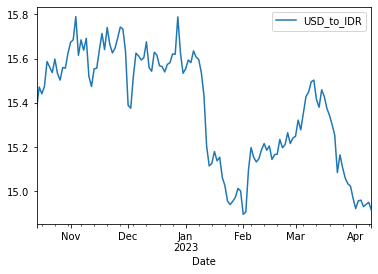

In [16]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

The visualization plot above is not yet complete. We could add the title of the plot, x-axis and y-axis.

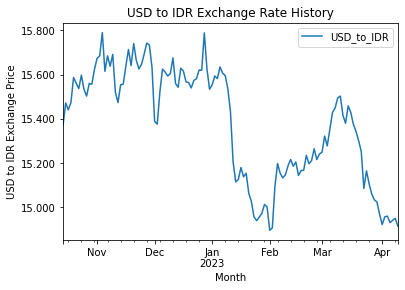

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

df.plot(
title = 'USD to IDR Exchange Rate History',
xlabel = 'Month',
ylabel = 'USD to IDR Exchange Price',)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) # 3 decimal places

Now that the visualization plot has been finished, we could conclude that the USD to IDR exchange rate has a stable price in November 2022 to early January 2023. The USD to IDR exchange rate also reached its highest price in November 2022 and January 2023. However in January 2023, the USD to IDR exchange rate dropped drastically until February 2023 which resulted in the USD to IDR exchange rate reaching the lowest price in February 2023. After that, the price of the USD to IDR exchange rate increased and again reached its lowest point again in April 2023.

The instability of the USD to IDR exchange rate, especially on January 2023 was most likely caused by the inflation that hit America. The inflation rate on January 2023 in America reached 6.4%. This high inflation rate could influence the exchange rate of USD to IDR.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.